# Intro to Python and Jupyter

## 1. Quick Jupyter Notebook guide

Use **Arrow keys** to move up and down
***

Use **Enter** to activate cell and **ESC** to deactivate it
***

Use **CTRL+Enter** to execute cell (interpret Markdown or Python code)
***

While cell is deactivated (you are in Command mode) use **M** to turn cell into Markdown or **Y** to switch to Python
___

**a** adds cell above and **b** adds cell below (**ALT+Enter** execute and insert below)
___

Delete cell using **dd**
___

More shortcuts will pop up after pressing **H**

## 2. Markdown guide

[Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

## 3. Python intro

### 3.1. IPython

**Getting help**

In [1]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [2]:
len.__doc__

'Return the number of items in a container.'

In [3]:
#IPython extended help function
?len

Signature: len(obj, /)
Docstring: Return the number of items in a container.
Type:      builtin_function_or_method


In [4]:
L=[1,2,3]
L.insert?

Signature: L.insert(index, object, /)
Docstring: Insert object before index.
Type:      builtin_function_or_method


In [5]:
def square(a):
    """Return the square of a."""
    return a**2

In [8]:
#Access source code
square??

Signature: square(a)
Source:   
def square(a):
    """Return the square of a."""
    return a**2
File:      /var/folders/_b/l_819g5924d_y00npn9gt60h0000gn/T/ipykernel_75267/2269350404.py
Type:      function


**Magic functions**

In [9]:
#Measure average exec time
%timeit L = [n ** 2 for n in range(1000)]

471 µs ± 8.01 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
#Help on magic functions
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

In [11]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [12]:
%%latex
$$x_i=\sum^N_{i=1}{e^i}$$

<IPython.core.display.Latex object>

**Shell functions**

In [ ]:
%pwd

In [ ]:
%cd ..
%cd -

In [ ]:
# ls - list
# cp - copy e.g. cp file1.csv folder/.
# mkdir - make directory e.g. mkdir results
# rm - remove file (or directory) e.g. rm python.py, rm -r folder

In [ ]:
!git

In [ ]:
!curl --help

### 3.2. ML in Python

#### Python resources
Official tutorial

https://docs.python.org/3/tutorial/

'Think' Series by Allen B. Downey

https://greenteapress.com/wp/think-python-2e/


Free programming books on GoalKicker:

https://goalkicker.com/PythonBook/

Online courses: Datacamp, Coursera, CodeAcademy

**Data Science and ML in Python**

Scikit-learn documentation

https://scikit-learn.org/stable/

Seaborn documentation

https://seaborn.pydata.org/

Python Data Science Handbook

https://jakevdp.github.io/PythonDataScienceHandbook/

Medium platform blogs (e.g. Towards Data Science)

**Modules for Data Science in Python**

**Numpy** - provides numerical data structures and required utilities (linear algebra tool) https://numpy.org/

**Pandas** - Python DataFrames + reading/writing datasets https://pandas.pydata.org/

**Matplotlib/Seaborn** - plotting, data visualization https://matplotlib.org/

**Scikit-learn** - ML models, evaluation metrics, preprocessing

Data Science/ML process:
- Gather data
- Explore and visualize the data (for cleaning and preprocessing purposes)
- Prepare the data
- Explore and visualize the clean data (for gathering insight, preparing for modelling process)
- Train the ML models
- Validate and assess ML models

**'Production' ML project lifecycle (from "ML Engineering" by Andriy Burkov)**
![](./ML_Project_Cycle.PNG)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random

In [14]:
DATA_SET = pd.read_fwf(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric",
    header=None,
)
DATA_SET.rename(columns={24: "target"}, inplace=True)
DATA_SET["target"] = DATA_SET["target"] - 1  # recoding target variable

In [15]:
%%timeit
#One-time version
#random 80% of indexes values
rand = random.sample(range(0,len(DATA_SET)-1),int(0.8*len(DATA_SET)))
train = DATA_SET.iloc[rand]
val = DATA_SET.drop(rand)

1.12 ms ± 18.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
dataset = DATA_SET

In [23]:
n = len(dataset)
range(0, n-1)

range(0, 999)

In [ ]:
# Reuseable function
def split_data_set(dataset, training_fraction):
    n = len(dataset)
    rand = random.sample(range(0, n - 1), int(training_fraction * n))
    train = dataset.iloc[rand]
    val = dataset.drop(rand)
    return train, val

In [ ]:
%timeit train_set, val_set = split_data_set(DATA_SET, 0.7)

In [30]:
#Or use function from imported package - train_test_split() from sklearn
X = DATA_SET.drop(['target'],axis=1)
y = DATA_SET['target']
%timeit X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

853 µs ± 32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Splitting data into training and validation set is done to avoid overfitting and to assess performance in more realistic situation (model will predict outcome on data it has never seen before).

[Related to Bias vs. Variance Tradeoff (Underfitting vs. Overfitting)](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#The-Bias-variance-trade-off)

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-validation-curve.png)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [32]:
def PolynomialReg(X, y, degree=2):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(
        X.reshape(-1, 1), y
    )

In [33]:
def true_process_with_noise(x: np.array, seed: int = 123) -> float:
    np.random.seed(seed)
    return 2 * np.log(x) + 0.4 * np.random.normal(size=x.size) + 2

In [34]:
n = 40
random.seed(24)
test = random.sample(range(n), int(n * 0.2))
mask = np.ones(n, bool)
mask[test] = False

In [35]:
x = np.linspace(2, 10, n)
random.seed(42)
y = true_process_with_noise(x)
X_train = x[mask]
y_train = y[mask]
X_test = x[~mask]
y_test = y[~mask]

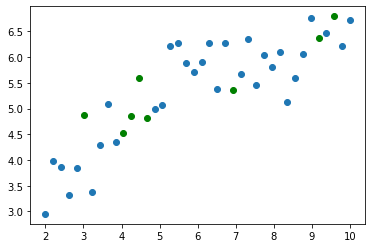

In [36]:
plt.plot(X_train, y_train, "o")
plt.plot(X_test, y_test, "go")

In [37]:
# Train polynomial regression with degree 1 and 20
model1 = PolynomialReg(X_train, y_train, 1)
model20 = PolynomialReg(X_train, y_train, 20)
# Predict values on train and test data
pred_train1 = model1.predict(X_train.reshape(-1, 1))
pred_train20 = model20.predict(X_train.reshape(-1, 1))
pred_test1 = model1.predict(X_test.reshape(-1, 1))
pred_test20 = model20.predict(X_test.reshape(-1, 1))

Text(0.5, 1.0, 'Degree 20')

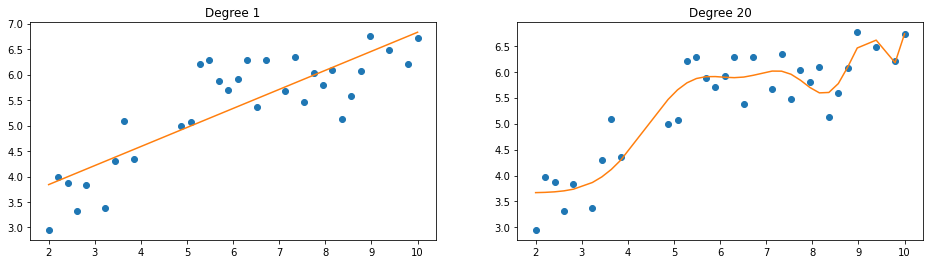

In [38]:
# Training data
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].plot(X_train, y_train, "o")
ax[0].plot(X_train, pred_train1)
ax[0].set_title("Degree 1")
ax[1].plot(X_train, y_train, "o")
ax[1].plot(X_train, pred_train20)
ax[1].set_title("Degree 20")

Text(0.5, 1.0, 'Degree 20')

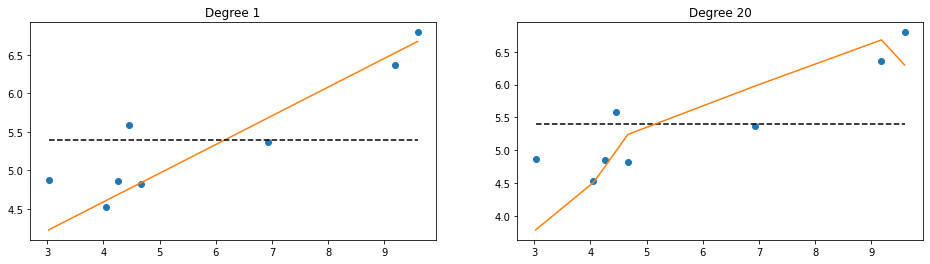

In [39]:
# Test data
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].plot(X_test, y_test, "o")
ax[0].plot(X_test, pred_test1)
ax[0].plot(X_test, [np.mean(y_test)] * X_test.size, "k--")
ax[0].set_title("Degree 1")
ax[1].plot(X_test, y_test, "o")
ax[1].plot(X_test, [np.mean(y_test)] * X_test.size, "k--")
ax[1].plot(X_test, pred_test20)
ax[1].set_title("Degree 20")

In [40]:
def R_squared(y_pred, y_true):
    y_mean = np.mean(y_true)
    ssres = (y_true - y_pred) ** 2
    sstot = (y_true - y_mean) ** 2
    r_square = 1 - (sum(ssres) / sum(sstot))
    return str(round(r_square * 100, 1)) + "%"

In [41]:
print("R^2 degree 1 on training data:", R_squared(pred_train1, y_train))
print("R^2 degree 20 on training data:", R_squared(pred_train20, y_train))
print("R^2 degree 1 on test data:", R_squared(pred_test1, y_test))
print("R^2 degree 20 on test data:", R_squared(pred_test20, y_test))

R^2 degree 1 on training data: 71.2%
R^2 degree 20 on training data: 86.6%
R^2 degree 1 on test data: 72.0%
R^2 degree 20 on test data: 46.9%


Handling overfitting:
- Gather more records (rows)
- Gather/produce more features (columns)
- Use less powerful/elastic/flexible model
- Use special data preparation or training techniques (balancing data, cross-validation)
- **Use regularization techniques**